In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import pandas as p
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import colors
from Bio import SeqIO
from Bio.SeqRecord import SeqRecord
from Bio.Seq import Seq
import copy
import datetime
%matplotlib inline

In [2]:
data = p.read_table('../data/allBarcodeCounts_withGradients_corrected.tab')


In [3]:
bc_fasta = SeqIO.to_dict(SeqIO.parse(open('../data/Consecutive_500pool_NoConstant_OneAncestor_ReverseComplement_BothBCs.fasta'),'fasta'))

In [4]:
data['barcode'] = list(bc_fasta.keys()) + ['9999999']
data['barcode'] = [int(bc) for bc in data['barcode'].values]
data = data.sort_values('barcode')

In [5]:
new_cols = []

for col in data.columns:
    if '/' in col:
        new_cols.append(col.split('/')[1].split('_barcodeCounts')[0])
    else:
        new_cols.append(col)
data.columns = new_cols
data = data.drop(['BCID'],axis=1)

In [6]:
data[[col for col in data.columns if 'Y1' in col or 'CC1' in col]]

,Y1-DE1-PCRb,CC1-DE1-PCRa,Y1-DE1-PCRa
0,518,1263,1422
1,19387,86131,39646
2,362,956,1043
3,5685,22251,11558
4,2253,9308,5232
5,6951,35411,12980
6,0,0,0
7,426,901,936
8,2199,11231,3910
9,421,1036,1069


In [7]:
flask_swaps = {'Y1':'CC1','Z1':'DD1','CC1':'Y1','DD1':'Z1'}

# data_columns = [col for col in data.columns if col != ]

# corrected_data = copy.copy(data)

corrected_data = {}
for col in data.columns:
    if '-DE' in col:
        flask,de,pcr = col.split('-')
    
        if flask in flask_swaps.keys():
            corrected_data[flask_swaps[flask]+f'-{de}-{pcr}'] = data[col]
        else:
            corrected_data[col] = data[col]
    else:
        corrected_data[col] = data[col]

# corrected_data
data = p.DataFrame.from_dict(corrected_data)
# data['barcode']

In [8]:
data[[col for col in data.columns if 'Y1' in col or 'CC1' in col]]

,CC1-DE1-PCRa,CC1-DE1-PCRb,Y1-DE1-PCRa
0,1422,518,1263
1,39646,19387,86131
2,1043,362,956
3,11558,5685,22251
4,5232,2253,9308
5,12980,6951,35411
6,0,0,0
7,936,426,901
8,3910,2199,11231
9,1069,421,1036


In [9]:
mutation_data = p.read_table('../data/mutationsByBarcodeHighQuality.txt')

In [10]:
mutation_cols = [col for col in mutation_data.columns if ('fitness' not in col and 'error' not in col) ]

tor_genes = ['KOG1','TOR1','SCH9']
ras_genes = ['IRA1','IRA2','GPB1','GPB2','PDE2','RAS2','CYR1','TFS1']

genelist = ['Diploid','Diploid + Chr11Amp','Diploid + Chr12Amp'] + ras_genes + tor_genes

mutation_data = mutation_data[mutation_cols]
mutation_data = mutation_data.sort_values('barcode')

### called neutral by atish's method in ALL 5000 bc experiments (I think - need to verify this)
### [could also be below some set threshold across all experiments]
full_neutral_list = [17615,18486,42040,45014,58284,63611,73731,74185,80465,94896
,120600,125697,132511,134852,135750,190551,228237,238783,255561,298344
,308537,316954,317346,335717,411685,454359,469053] 

### from previous list but never has fitness above 3.5% (per gen) in any of 5000bc experiments
supergood_neutral = [17615, 24362, 42040, 71926, 72939, 73802, 80465, 109476, 113483, 
                     134852, 135750, 238783, 263665, 276406, 316954, 335717, 454359] 

### pulled from supergood list and spiked into 1BigBatch experiments
neutral_spikes = [17615,24362,42040,71926,73802,109476,113483,134852,263665,316954]

# neutrals = full_neutral_list
neutrals = list(np.unique(full_neutral_list+supergood_neutral+neutral_spikes))



In [11]:

spike_in_missense = [9000000 + i for i in range(11)]
spike_in_nonsense = [9000100 + i for i in range(11)]

bc_list = []
gene_list = []
ploidy_list = []
class_list = []
type_list = []
additional_muts = []
for bc in data['barcode'].values:
    if bc in spike_in_missense:
        gene_list.append('IRA1')
        ploidy_list.append('Haploid')
        class_list.append('PKA')
        type_list.append('missense')
        additional_muts.append('None')
    elif bc in spike_in_nonsense:
        gene_list.append('IRA1')
        ploidy_list.append('Haploid')
        class_list.append('PKA')
        type_list.append('stop_gained')
        additional_muts.append('None')
    elif bc == 9999999:
        gene_list.append('Ancestor')
        ploidy_list.append('Haploid')
        class_list.append('Ancestor')
        type_list.append('Ancestor')
        additional_muts.append('None')
    elif bc in mutation_data['barcode'].values:
        
        this_mutant = mutation_data[mutation_data['barcode']==bc]
        found_gene = this_mutant[this_mutant['gene'].isin(genelist)]

        if len(found_gene.index) == 0:
            if bc in neutrals:
                gene_list.append('other')
                type_list.append('other')
                ploidy_list.append('other')
                class_list.append('ExpNeutral')
            else:
                gene_list.append('other')
                type_list.append('other')
                ploidy_list.append('other')
                class_list.append('other')
            

                

        elif len(found_gene.index) == 1:
            gene_list.append(found_gene['gene'].values[0])
            type_list.append(found_gene['type'].values[0])
            ploidy_list.append(found_gene['ploidy'].values[0])

            if found_gene['gene'].values[0] in tor_genes:
                class_list.append('PKA')
            elif found_gene['gene'].values[0] in ras_genes:
                class_list.append('PKA')
            elif found_gene['gene'].values[0] in ['Diploid + Chr11Amp','Diploid + Chr12Amp']:
                class_list.append('Adaptive Diploid')
            elif found_gene['gene'].values[0] in ['Diploid']:
                class_list.append('Diploid')

        else:
            if 'Diploid + Chr11Amp' in found_gene['gene'].values:
                gene_list.append('Diploid + Chr11Amp')
                type_list.append('Diploid + Chr11Amp')
                ploidy_list.append(found_gene['ploidy'].values[0])
                class_list.append('Adaptive Diploid')
                
            elif 'Diploid + Chr12Amp' in found_gene['gene'].values:
                gene_list.append('Diploid + Chr12Amp')
                type_list.append('Diploid + Chr12Amp')
                ploidy_list.append(found_gene['ploidy'].values[0])
                class_list.append('Adaptive Diploid')
            
            elif 'Diploid' in found_gene['gene'].values:
                other_index = np.where(found_gene['gene'].values != 'Diploid')[0][0]
                gene_list.append('Diploid + ' + found_gene['gene'].values[other_index])
                type_list.append(found_gene['type'].values[other_index])
                ploidy_list.append(found_gene['ploidy'].values[0])
                class_list.append('Adaptive Diploid')
            else:
                print('Panic! A double mutant was found!')


        additional = this_mutant[~(this_mutant['gene'].isin(genelist))]
        if len(this_mutant[~(this_mutant['gene'].isin(genelist))]['gene'].values) > 0:
            additional_muts.append('; '.join([str(g)+'-'+str(t) for g,t in zip(additional['gene'].values,additional['type'].values)]))
        else:
            additional_muts.append('None')
        
        
    else:
        
        if bc in neutrals:
            gene_list.append('NotSequenced')
            type_list.append('NotSequenced')
            ploidy_list.append('NotSequenced')
            class_list.append('ExpNeutral')
            additional_muts.append('NotSequenced')
        else:
            gene_list.append('NotSequenced')
            ploidy_list.append('NotSequenced')
            class_list.append('NotSequenced')
            type_list.append('NotSequenced')
            additional_muts.append('NotSequenced')
            

data['gene'] = gene_list
data['type'] = type_list
data['ploidy'] = ploidy_list
data['class'] = class_list

data['additional_muts'] = additional_muts

In [12]:
data[data['class']=='ExpNeutral']

,1.4%-R1-T1,1.4%-R1-T2,1.4%-R1-T3,1.4%-R1-T4,1.4%-R2-T1,1.4%-R2-T2,1.4%-R2-T3,1.4%-R2-T4,1.4%-T0,1.5%-R1-T1,...,Z2-DE2-PCRa,Z3-DE1-PCRa,Z4-DE1-PCRa,Z4-DE2-PCRa,barcode,gene,type,ploidy,class,additional_muts
520,18,14,9,3,1,13,6,1,14,10,...,52,8,39,54,17615,NotSequenced,NotSequenced,NotSequenced,ExpNeutral,NotSequenced
521,35,10,8,4,1,14,8,1,11,8,...,71,5,45,32,24362,NotSequenced,NotSequenced,NotSequenced,ExpNeutral,NotSequenced
522,41,23,10,3,0,25,4,4,22,25,...,59,4,28,18,42040,NotSequenced,NotSequenced,NotSequenced,ExpNeutral,NotSequenced
523,59,17,11,8,1,20,5,3,24,18,...,25,3,29,31,71926,NotSequenced,NotSequenced,NotSequenced,ExpNeutral,NotSequenced
288,94,27,15,11,1,26,17,10,35,48,...,28,3,32,28,72939,NotSequenced,NotSequenced,NotSequenced,ExpNeutral,NotSequenced
524,77,25,10,7,1,35,6,6,26,33,...,136,15,88,98,73802,NotSequenced,NotSequenced,NotSequenced,ExpNeutral,NotSequenced
525,46,15,8,4,2,31,9,1,21,23,...,39,4,20,24,109476,NotSequenced,NotSequenced,NotSequenced,ExpNeutral,NotSequenced
526,63,20,9,4,0,17,7,4,16,17,...,116,8,88,76,113483,NotSequenced,NotSequenced,NotSequenced,ExpNeutral,NotSequenced
350,27,17,10,4,1,15,10,5,10,19,...,70,9,32,35,120600,other,other,other,ExpNeutral,nan-upstream_indel_variant
527,66,29,18,7,1,22,10,7,12,22,...,147,14,86,87,134852,NotSequenced,NotSequenced,NotSequenced,ExpNeutral,NotSequenced


In [13]:
data.to_csv(f"../data/BarcodeCounts_{datetime.date.today().strftime('%m%d%y')}_withBCinfo.csv",index=False)

In [14]:
cols_by_condition = np.unique([col.split('-DE')[0] for col in data.columns])

In [15]:
bad_samples = ['B3-DE1-PCRb']

In [16]:
flask_swaps = {'Y1':'CC1','Z1':'DD1','CC1':'Y1','DD1':'Z1'}

merged_data = {}

for merge_col in cols_by_condition:
    print(merge_col)
    this_data = np.zeros(len(data.index))
    for col in data.columns:
        if col not in bad_samples:
#         print(col)
            if 'DE' in col:
                if col.split('-DE')[0] == merge_col:
                    this_data = this_data + data[col].values
                    print(col)
            elif '-' in col:
                if col == merge_col:
                    this_data = this_data + data[col].values
                    print(col)
            
    merged_data[merge_col] = this_data
merged_data['barcode'] = data['barcode'].values
merged_data['gene'] = data['gene'].values
merged_data['ploidy'] = data['ploidy'].values
merged_data['class'] = data['class'].values
merged_data['type'] = data['type'].values
merged_data['additional_muts'] = data['additional_muts'].values
 
corrected_data = copy.copy(merged_data)
for k,v in flask_swaps.items():
    corrected_data[k] = merged_data[v]
merged_data = p.DataFrame.from_dict(corrected_data)

1.4%-R1-T1
1.4%-R1-T1
1.4%-R1-T2
1.4%-R1-T2
1.4%-R1-T3
1.4%-R1-T3
1.4%-R1-T4
1.4%-R1-T4
1.4%-R2-T1
1.4%-R2-T1
1.4%-R2-T2
1.4%-R2-T2
1.4%-R2-T3
1.4%-R2-T3
1.4%-R2-T4
1.4%-R2-T4
1.4%-T0
1.4%-T0
1.5%-R1-T1
1.5%-R1-T1
1.5%-R1-T2
1.5%-R1-T2
1.5%-R1-T3
1.5%-R1-T3
1.5%-R1-T4
1.5%-R1-T4
1.5%-R2-T1
1.5%-R2-T1
1.5%-R2-T2
1.5%-R2-T2
1.5%-R2-T3
1.5%-R2-T3
1.5%-R2-T4
1.5%-R2-T4
1.5%-T0
1.5%-T0
1.6%-R1-T1
1.6%-R1-T1
1.6%-R1-T2
1.6%-R1-T2
1.6%-R1-T3
1.6%-R1-T3
1.6%-R1-T4
1.6%-R1-T4
1.6%-R2-T1
1.6%-R2-T1
1.6%-R2-T2
1.6%-R2-T2
1.6%-R2-T3
1.6%-R2-T3
1.6%-R2-T4
1.6%-R2-T4
1.6%-T0
1.6%-T0
1.7%-R1-T1
1.7%-R1-T1
1.7%-R1-T2
1.7%-R1-T2
1.7%-R1-T3
1.7%-R1-T3
1.7%-R1-T4
1.7%-R1-T4
1.7%-R2-T1
1.7%-R2-T1
1.7%-R2-T2
1.7%-R2-T2
1.7%-R2-T3
1.7%-R2-T3
1.7%-R2-T4
1.7%-R2-T4
1.7%-T0
1.7%-T0
1.8%-R1-T1
1.8%-R1-T1
1.8%-R1-T2
1.8%-R1-T2
1.8%-R1-T3
1.8%-R1-T3
1.8%-R1-T4
1.8%-R1-T4
1.8%-R2-T1
1.8%-R2-T1
1.8%-R2-T2
1.8%-R2-T2
1.8%-R2-T3
1.8%-R2-T3
1.8%-R2-T4
1.8%-R2-T4
1.8%-T0
1.8%-T0
13-0
13-0
13-0_pool
13-0_pool
13-1-1
13-

In [17]:
[col for col in merged_data.columns if 'B' in col]

['B0',
 'B1',
 'B2',
 'B3',
 'B4',
 'BB0',
 'BB1',
 'BB2',
 'BB3',
 'BB4',
 'Ben0.4-R1-T1',
 'Ben0.4-R1-T2',
 'Ben0.4-R1-T3',
 'Ben0.4-R1-T4',
 'Ben0.4-R2-T1',
 'Ben0.4-R2-T2',
 'Ben0.4-R2-T3',
 'Ben0.4-R2-T4',
 'Ben0.4-T0',
 'Ben10-R1-T1',
 'Ben10-R1-T2',
 'Ben10-R1-T3',
 'Ben10-R1-T4',
 'Ben10-R2-T1',
 'Ben10-R2-T2',
 'Ben10-R2-T3',
 'Ben10-R2-T4',
 'Ben10-T0',
 'Ben2-R1-T1',
 'Ben2-R1-T2',
 'Ben2-R1-T3',
 'Ben2-R1-T4',
 'Ben2-R2-T1',
 'Ben2-R2-T2',
 'Ben2-R2-T3',
 'Ben2-R2-T4',
 'Ben2-T0']

In [18]:
merged_data.to_csv(f"../data/BarcodeCounts_merged+flaskswapcorrected_{datetime.date.today().strftime('%m%d%y')}_withBCinfo.csv",index=False)

In [18]:
[(col,sum(merged_data[col].values)) for col in merged_data.columns if np.isreal(merged_data[col].values[0])]

[('1.4%-R1-T1', 388627.0),
 ('1.4%-R1-T2', 290123.0),
 ('1.4%-R1-T3', 344366.0),
 ('1.4%-R1-T4', 434063.0),
 ('1.4%-R2-T1', 4988.0),
 ('1.4%-R2-T2', 236245.0),
 ('1.4%-R2-T3', 210571.0),
 ('1.4%-R2-T4', 217579.0),
 ('1.4%-T0', 65807.0),
 ('1.5%-R1-T1', 140694.0),
 ('1.5%-R1-T2', 177098.0),
 ('1.5%-R1-T3', 167405.0),
 ('1.5%-R1-T4', 286319.0),
 ('1.5%-R2-T1', 113617.0),
 ('1.5%-R2-T2', 159983.0),
 ('1.5%-R2-T3', 175245.0),
 ('1.5%-R2-T4', 256189.0),
 ('1.5%-T0', 113485.0),
 ('1.6%-R1-T1', 280834.0),
 ('1.6%-R1-T2', 294873.0),
 ('1.6%-R1-T3', 318094.0),
 ('1.6%-R1-T4', 782743.0),
 ('1.6%-R2-T1', 189524.0),
 ('1.6%-R2-T2', 374103.0),
 ('1.6%-R2-T3', 329432.0),
 ('1.6%-R2-T4', 358567.0),
 ('1.6%-T0', 116899.0),
 ('1.7%-R1-T1', 243909.0),
 ('1.7%-R1-T2', 350289.0),
 ('1.7%-R1-T3', 278960.0),
 ('1.7%-R1-T4', 290897.0),
 ('1.7%-R2-T1', 200845.0),
 ('1.7%-R2-T2', 211363.0),
 ('1.7%-R2-T3', 159658.0),
 ('1.7%-R2-T4', 536698.0),
 ('1.7%-T0', 160384.0),
 ('1.8%-R1-T1', 644240.0),
 ('1.8%-R1-T2', 

In [58]:
[(col,sum(data[col].values)) for col in data.columns if np.isreal(data[col].values[0])]

[('D0-DE1-PCRb', 994249),
 ('Z4-DE2-PCRa', 914604),
 ('AA2-DE1-PCRa', 6604506),
 ('13-1-2', 1326597),
 ('18-1-2', 292557),
 ('C0-DE1-PCRa', 454180),
 ('G3-DE1-PCRa', 494037),
 ('20-1-2', 2459082),
 ('21-1-2', 918512),
 ('23-1-2', 2827683),
 ('3-2-2', 2555814),
 ('6-2-2', 46142),
 ('C0-DE2-PCRa', 350636),
 ('H2-DE1-PCRa', 2428141),
 ('D4-DE1-PCRb', 6383413),
 ('BB0-DE1-PCRa', 5946522),
 ('I1-DE1-PCRa', 5505072),
 ('C4-DE1-PCRa', 612955),
 ('13-0_pool', 38602),
 ('3-1-3', 1270522),
 ('6-1-3', 2053),
 ('C4-DE2-PCRa', 1618149),
 ('A0-DE1-PCRb', 585611),
 ('B0-DE2-PCRc', 187553),
 ('DD3-DE1-PCRa', 802118),
 ('K0-DE1-PCRb', 872931),
 ('E3-DE1-PCRb', 1110494),
 ('C4-DE3-PCRa', 10965083),
 ('J0-DE1-PCRa', 1293294),
 ('D3-DE1-PCRa', 442052),
 ('GG0-DE1-PCRa', 4511059),
 ('F2-DE1-PCRb', 11754743),
 ('Z2-DE1-PCRb', 364067),
 ('E2-DE1-PCRa', 2777168),
 ('BB4-DE1-PCRa', 631969),
 ('O2-DE1-PCRa', 3366288),
 ('Y2-DE1-PCRa', 16409117),
 ('Y2-DE2-PCRa', 6042976),
 ('13-4-1', 1479293),
 ('A4-DE1-PCRb', 

In [19]:
def colnum_string(n):
    string = ""
    if n > 25:
        n = (n % 26)
        return str(chr(65 + n))+str(chr(65 + n))
    else:
        return chr(65 + n)
    

conditions = [colnum_string(i) for i in range(0,33)]

In [10]:
conditions

['A',
 'B',
 'C',
 'D',
 'E',
 'F',
 'G',
 'H',
 'I',
 'J',
 'K',
 'L',
 'M',
 'N',
 'O',
 'P',
 'Q',
 'R',
 'S',
 'T',
 'U',
 'V',
 'W',
 'X',
 'Y',
 'Z',
 'AA',
 'BB',
 'CC',
 'DD',
 'EE',
 'FF',
 'GG']

In [11]:
codenames = {'A':'M3 A',
            'B':'M3 B',
            'C':'M3 C',
            'D':'M3 D',
            'E':'Baffle A',
            'F':'Baffle B'}

In [14]:
data = merged_data
conditions = [colnum_string(i) for i in range(0,33)]
plt.figure(figsize=(5*6,6*5))
for counter,condition in enumerate(conditions):
    ax = plt.subplot(6,6,counter+1)
    timepoints = []
    these_times = []
    for i in range(5):
        for col in data.columns:
            if condition+str(i) == col:
                if np.nansum(data[col]) > 1000:
                    these_times.append(col)
                    timepoints.append(i)
    print(these_times)
    BC_counts = data[these_times].values
    ax.plot(timepoints,(BC_counts/np.nansum(BC_counts,axis=0)).swapaxes(0,1),alpha=0.2,color='b')
    plt.yscale('log')
#     plt.title(codenames[condition])
    plt.title(condition)
    plt.tight_layout()
    plt.xticks(timepoints,timepoints)
    plt.xlim(0,5)
# plt.savefig(f'merged_trajectories_swapscorrected.pdf',bbox_inches='tight')

NameError: name 'colnum_string' is not defined

In [81]:
print(np.nansum(data['L2'].values),np.nansum(data['N2'].values),np.nansum(data['N3'].values),np.nansum(data['N4'].values))

11.0 5.0 175.0 1.0


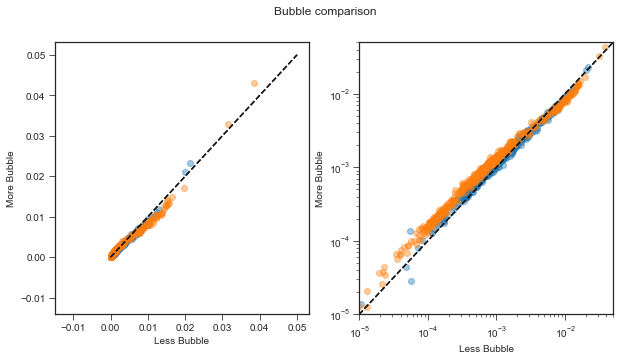

In [177]:
data = no_digest

plt.figure(figsize=(10,5))
plt.suptitle('Bubble comparison')
plt.subplot(1,2,1)
plt.scatter(data['C2-DE3-PCRa'].values/np.nansum(data['C2-DE3-PCRa'].values),data['C2-DE3-PCRb'].values/np.nansum(data['C2-DE3-PCRb'].values),alpha=0.4)
plt.plot([0,0.05],[0,0.05],'k--')

plt.scatter(data['C4-DE3-PCRa'].values/np.nansum(data['C4-DE3-PCRa'].values),data['C4-DE3-PCRb'].values/np.nansum(data['C4-DE3-PCRb'].values),alpha=0.4)
plt.plot([0,0.05],[0,0.05],'k--')
# plt.xlim(0,0.025)
# plt.ylim(0,0.025)
plt.xlabel('Less Bubble')
plt.ylabel('More Bubble')

plt.subplot(1,2,2)
plt.scatter(data['C2-DE3-PCRa'].values/np.nansum(data['C2-DE3-PCRa'].values),data['C2-DE3-PCRb'].values/np.nansum(data['C2-DE3-PCRb'].values),alpha=0.4)
plt.plot([0,0.05],[0,0.05],'k--')

plt.scatter(data['C4-DE3-PCRa'].values/np.nansum(data['C4-DE3-PCRa'].values),data['C4-DE3-PCRb'].values/np.nansum(data['C4-DE3-PCRb'].values),alpha=0.4)
plt.plot([0,0.05],[0,0.05],'k--')

plt.yscale('log')
plt.xscale('log')
plt.xlim(0.00001,0.05)
plt.ylim(0.00001,0.05)
plt.xlabel('Less Bubble')
plt.ylabel('More Bubble')

plt.savefig('bubble_product_comparison_nocutoffs.pdf',bbox_inches='tight')

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/scale.py:114: RuntimeWarning: invalid value encountered in less_equal
  out[a <= 0] = -1000


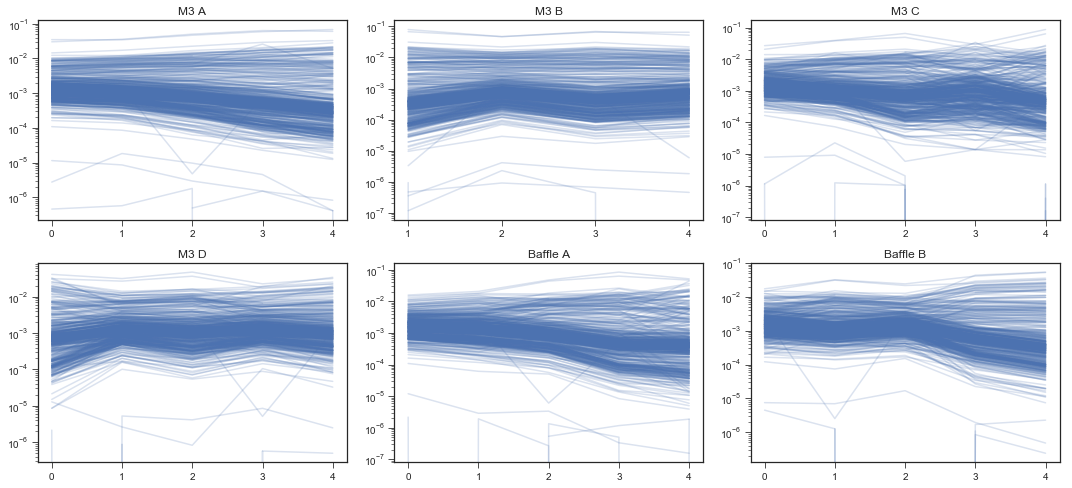

In [70]:
data = my_counts[my_counts['barcode']!=486239]

conditions = ['A','B','C','D','E','F']
plt.figure(figsize=(15,10))
for counter,condition in enumerate(conditions):
    ax = plt.subplot(3,3,counter+1)
    timepoints = []
    these_times = []
    for i in range(5):
        if condition+str(i) in data.columns:
            these_times.append(condition+str(i))
            timepoints.append(i)`
#     timepoints.insert(-1,0)
#     these_times.insert('',0)
    BC_counts = data[these_times].values
    ax.plot(timepoints,(BC_counts/np.nansum(BC_counts,axis=0)).swapaxes(0,1),alpha=0.2,color='b')
    plt.yscale('log')
    plt.title(codenames[condition])
    plt.tight_layout()
    plt.xticks(timepoints,timepoints)
plt.savefig(f'nodigest_noanc_{umi_method}_trajectories.pdf',bbox_inches='tight')

In [72]:
lane3[lane3['barcode']==75841]

,barcode,A2,F1,C2,C3,D3,E2,B1,B4
468,75841,6597,3062,4278,154,3465,9015,3922,1690


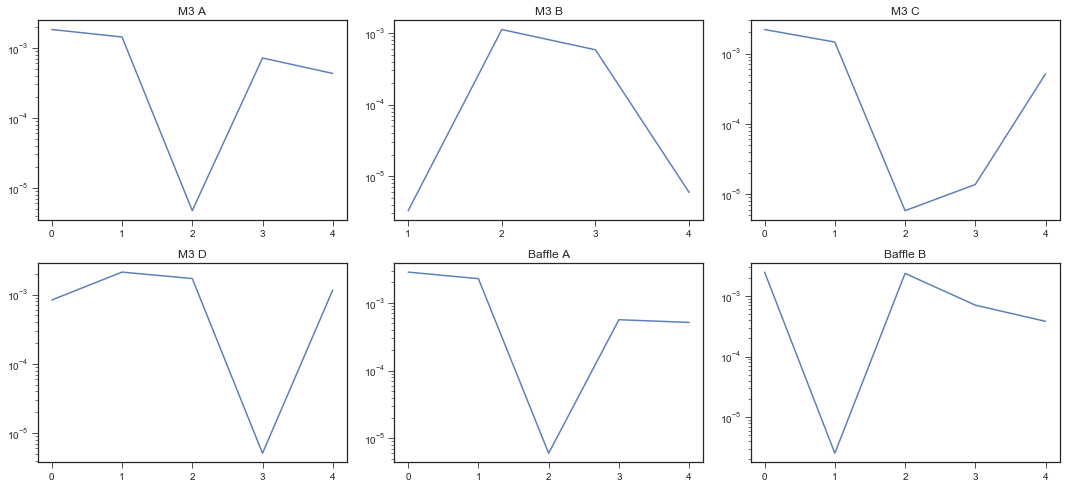

In [61]:
data = my_counts[my_counts['barcode']!=486239]

this_bc = my_counts[my_counts['barcode']==14888]

conditions = ['A','B','C','D','E','F']
plt.figure(figsize=(15,10))
for counter,condition in enumerate(conditions):
    ax = plt.subplot(3,3,counter+1)
    timepoints = []
    these_times = []
    for i in range(5):
        if condition+str(i) in data.columns:
            these_times.append(condition+str(i))
            timepoints.append(i)
#     timepoints.insert(-1,0)
#     these_times.insert('',0)
    BC_counts = data[these_times].values
    ax.plot(timepoints,(this_bc[these_times].values/np.nansum(BC_counts,axis=0)).swapaxes(0,1),alpha=0.9,color='b')
    plt.yscale('log')
    plt.title(codenames[condition])
    plt.tight_layout()
    plt.xticks(timepoints,timepoints)
plt.savefig('14888_{umi_method}_trajectories.pdf',bbox_inches='tight')

In [89]:
## Just a single fitness
my_counts = merged_data
data = my_counts[my_counts['barcode']!=486239]
neutral_spikes = [17615,24362,42040,71926,73802,109476,113483,134852,316954]
# neutral_spikes = [17615,42040,73802,109476,134852]
# neutrals = list(np.unique(neutrals + neutral_spikes))
neutrals = neutral_spikes
print(neutrals)
neutral_locs= []
for bc in neutrals:
    neutral_locs.append(np.where(data['barcode'].values == bc)[0][0])
print(neutral_locs)

# BC_counts = data[['M3_B_0','M3_B_1','M3_B_2','M3_B_3','M3_B_4']].values
BC_counts = data[['C0','C1','C2','C3','C4']].values
BC_counts = data[['A0','A1','A2','A3','A4']].values
timepoints = [0,1,2,3,4]
fitness = 0
kappa = 3.5
coverage = np.nansum(BC_counts,axis=0)

mean_fitness = np.zeros(len(timepoints)-1)
#                                                                         mean_fitness,fitness,BC_counts,timepoints,kappa,coverage
sol = scipy.optimize.minimize(mean_fitness_likelihood_singlefitness,mean_fitness,args=(fitness,BC_counts[neutral_locs,:],timepoints,kappa,coverage),method='BFGS')

[17615, 24362, 42040, 71926, 73802, 109476, 113483, 134852, 316954]
[520, 521, 522, 523, 524, 525, 526, 527, 529]
[[3257. 3805. 3476.  166.  438.]
 [3659. 3743. 3541.  159.  391.]
 [2793. 2617. 2306.   84.  244.]
 [2701. 2799. 2335.  141.  303.]
 [7863. 7757. 6966.  350.  868.]
 [2121. 2111. 2005.  118.  285.]
 [6893. 6444. 5552.  326.  857.]
 [6453. 6567. 5761.  281.  755.]
 [5465. 4792. 4753.  253.  500.]]
[3257.         4707.44274979 7265.43429541 1040.35124998 4085.04537532]
[3659.         5288.46577264 8162.18117498 1168.75812824 4589.24808974]
[2793.         4036.80921098 6230.38317074  892.14032582 3503.0800532 ]
[2701.         3903.83876794 6025.15751671  862.75367707 3387.69037726]
[ 7863.         11364.6368872  17540.10127874  2511.60020836
  9862.05458586]
[2121.         3065.54684443 4731.34361086  677.49002187 2660.23372461]
[ 6893.          9962.66591167 15376.30905689  2201.76271604
  8645.44604608]
[ 6453.          9326.72031452 14394.79505935  2061.21787416
  8093.5823

[2701.         2651.04608272 2497.09656976   63.41116104  352.14176908]
[7863.         7717.5769524  7269.40774826  184.59902232 1025.13540551]
[2121.         2081.7729513  1960.88183061   49.79454742  276.52450656]
[6893.         6765.51671536 6372.63482243  161.82640988  898.67205268]
[6453.         6333.6543398  5965.85122721  151.49656506  841.30723283]
[5465.         5363.92700558 5052.4371543   128.30136805  712.49713737]
[[3257. 3805. 3476.  166.  438.]
 [3659. 3743. 3541.  159.  391.]
 [2793. 2617. 2306.   84.  244.]
 [2701. 2799. 2335.  141.  303.]
 [7863. 7757. 6966.  350.  868.]
 [2121. 2111. 2005.  118.  285.]
 [6893. 6444. 5552.  326.  857.]
 [6453. 6567. 5761.  281.  755.]
 [5465. 4792. 4753.  253.  500.]]
[3257.         3196.76313221 3011.12311282   76.46432859  424.63004143]
[3659.         3591.32830849 3382.77539754   85.90205045  477.04062683]
[2793.         2741.34462028 2582.15132149   65.57103769  364.13623141]
[2701.         2651.04612223 2497.09656976   63.411161

 [5465. 4792. 4753.  253.  500.]]
[3257.         3208.9479127  2897.56680303  149.12911175  366.64197152]
[3659.         3605.01701338 3255.20323373  167.535591    411.89529437]
[2793.         2751.79352784 2484.77251485  127.88382227  314.40928046]
[2701.         2661.15084808 2402.9253715   123.67139418  304.05279861]
[7863.         7746.99337966 6995.26182751  360.0252397   885.14148665]
[2121.         2089.70786701 1886.93251127   97.11478232  238.76193478]
[6893.         6791.30425614 6132.30825092  315.61159573  775.94814543]
[6453.         6357.79578773 5740.86539144  295.46520053  726.41714528]
[5465.         5384.37222687 4861.89824333  250.22738585  615.19753587]
[[3257. 3805. 3476.  166.  438.]
 [3659. 3743. 3541.  159.  391.]
 [2793. 2617. 2306.   84.  244.]
 [2701. 2799. 2335.  141.  303.]
 [7863. 7757. 6966.  350.  868.]
 [2121. 2111. 2005.  118.  285.]
 [6893. 6444. 5552.  326.  857.]
 [6453. 6567. 5761.  281.  755.]
 [5465. 4792. 4753.  253.  500.]]
[3257.         3208.

[6893.         6791.30472308 6132.30867094  315.61158782  775.94837294]
[6453.         6357.79622487 5740.86578465  295.46519312  726.41735828]
[5465.         5384.37259707 4861.89857634  250.22737958  615.19771625]
[[3257. 3805. 3476.  166.  438.]
 [3659. 3743. 3541.  159.  391.]
 [2793. 2617. 2306.   84.  244.]
 [2701. 2799. 2335.  141.  303.]
 [7863. 7757. 6966.  350.  868.]
 [2121. 2111. 2005.  118.  285.]
 [6893. 6444. 5552.  326.  857.]
 [6453. 6567. 5761.  281.  755.]
 [5465. 4792. 4753.  253.  500.]]
[3257.         3208.94813333 2897.56700149  149.12911023  366.64207902]
[3659.         3605.01726124 3255.20345669  167.5355893   411.89541515]
[2793.         2751.79371704 2484.77268503  127.88382097  314.40937264]
[2701.         2661.15103105 2402.92553608  123.67139292  304.05288776]
[7863.         7746.99391231 6995.26230663  360.02523604  885.14174618]
[2121.         2089.70801068 1886.93264051   97.11478133  238.76200479]
[6893.         6791.30472308 6132.30867094  315.611592

[3659.         3605.01726124 3255.20345669  167.5355893   411.89542128]
[2793.         2751.79371704 2484.77268503  127.88382097  314.40937733]
[2701.         2661.15103105 2402.92553608  123.67139292  304.05289229]
[7863.         7746.99391231 6995.26230663  360.02523604  885.14175937]
[2121.         2089.70801068 1886.93264051   97.11478133  238.76200835]
[6893.         6791.30472308 6132.30867094  315.61159252  775.9483845 ]
[6453.         6357.79622487 5740.86578465  295.46519753  726.4173691 ]
[5465.         5384.37259707 4861.89857634  250.22738331  615.19772542]
[[3257. 3805. 3476.  166.  438.]
 [3659. 3743. 3541.  159.  391.]
 [2793. 2617. 2306.   84.  244.]
 [2701. 2799. 2335.  141.  303.]
 [7863. 7757. 6966.  350.  868.]
 [2121. 2111. 2005.  118.  285.]
 [6893. 6444. 5552.  326.  857.]
 [6453. 6567. 5761.  281.  755.]
 [5465. 4792. 4753.  253.  500.]]
[3257.         3208.94808552 2897.56695831  149.12910801  366.64207902]
[3659.         3605.01720752 3255.20340818  167.535586

[3147482. 4549153. 7021131. 1005369. 3947684.]
[ 6294.964  9098.306 14042.262  2010.738  7895.368]


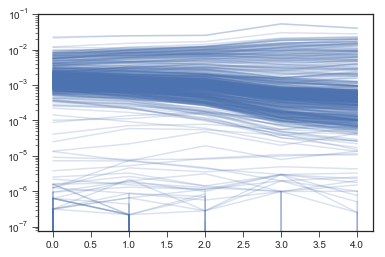

In [90]:
data = merged_data

BC_counts = data[['C0','C1','C2','C3','C4']].values
BC_counts = data[['A0','A1','A2','A3','A4']].values

plt.plot((BC_counts/np.nansum(BC_counts,axis=0)).swapaxes(0,1),alpha=0.2,color='b')
plt.yscale('log')
# plt.title('M3 C with Duplicates Removed ')
print(np.nansum(BC_counts,axis=0))
print(np.nansum(BC_counts,axis=0)/500)
# plt.savefig('m3c_nodups_lineagetraces.pdf',bbox_inches='tight')

In [91]:
lineages = BC_counts.shape[0]
exp_reads = np.nan * np.ones((lineages,len(timepoints)))
# log_likelihoods = np.nan * np.ones((lineages,len(timepoints)))
mean_fitness = sol.x
for i in range(lineages):
    exp_reads[i,:] = expected_reads_singleBC(fitness,BC_counts[i,:],timepoints,mean_fitness,coverage)
#         print(exp_reads)

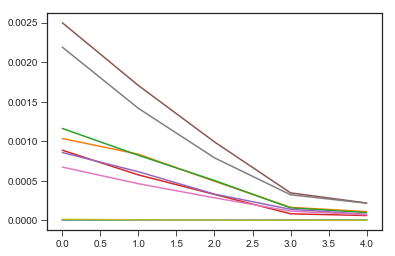

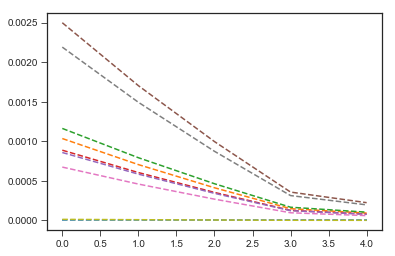

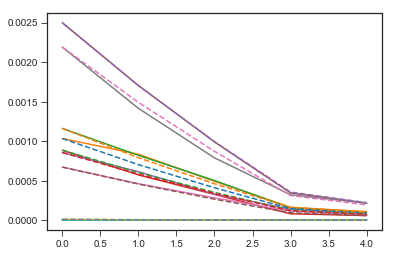

In [92]:
plt.figure()
plt.plot((BC_counts[neutral_locs,:]/np.nansum(BC_counts,axis=0)).swapaxes(0,1))

plt.figure()
plt.plot((exp_reads[neutral_locs,:]/np.nansum(BC_counts,axis=0)).swapaxes(0,1),linestyle='--')

plt.figure()
plt.plot((BC_counts[neutral_locs,:]/np.nansum(BC_counts,axis=0)).swapaxes(0,1))
plt.plot((exp_reads[neutral_locs,:]/np.nansum(BC_counts,axis=0)).swapaxes(0,1),linestyle='--')

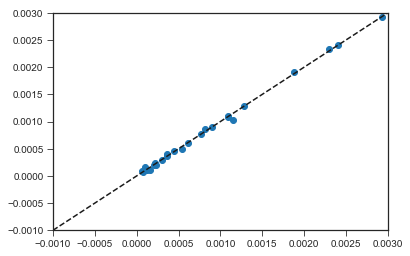

In [64]:
plt.scatter((BC_counts[neutral_locs,:]/np.nansum(BC_counts,axis=0)).swapaxes(0,1),(exp_reads[neutral_locs,:]/np.nansum(BC_counts,axis=0)).swapaxes(0,1))
plt.xlim(-0.001,0.003)
plt.ylim(-0.001,0.003)
plt.plot([-0.001,0.003],[-0.001,0.003],'k--')
# plt.figure()
# plt.scatter((BC_counts[neutral_locs,:]/np.nansum(BC_counts,axis=0)).swapaxes(0,1),(exp_reads[neutral_locs,:]/np.nansum(BC_counts,axis=0)).swapaxes(0,1))
# plt.xlim(-0.001,0.003)
# plt.ylim(-0.001,0.003)
# plt.xscale('log')
# plt.yscale('log')
# plt.plot([-0.001,0.003],[-0.001,0.003],'k--')


In [25]:
np.nansum(BC_counts,axis=0)

array([ 9613763.,   386143., 14721246., 16613548., 40536093.])

In [95]:
def expected_reads_singleBC(fitness,BC_counts,timepoints,mean_fitness,coverage):

    exp_reads = np.zeros(len(timepoints))

    exp_reads[0] = BC_counts[0]

    for t in range(1,len(timepoints)):
        exp_reads[t] = max([coverage[t]/coverage[t-1]*exp_reads[t-1]*np.exp((fitness-mean_fitness[t-1])*(timepoints[t]-timepoints[t-1])),0]) 

    return exp_reads

def mean_fitness_likelihood_jointfitness(parameters,index_mappings,BC_counts,timepoints,kappa,coverage,poisson_cutoff=20,gaussian_cutoff=10):

    """ 
    Likelihood function from Levy et al 2015 (and FitSeq. Fangfei Li et al. 2018)

    If enough expected and actual reads, use full likelihood function derived in Levy supplement, which is:

    P( r_t+1 | r_t ) = Sqrt[ ((r_t*np.exp(-()))]

    If few expected and actual reads, then a Poisson distribution is best fit.

    If few expected but a decent number of actual, then Poisson is well-approximated by Gaussian distribution (and no need to calculate factorial on large value)

    If few expected and no actual reads, then Poisson but observing no instantiations.

    """
    
    mean_fitness = parameters[:len(timepoints)-1]
    fitnesses = [0] + list(parameters[len(timepoints)-1:])
#     print(mean_fitness)
#     print(fitnesses)
#     print(index_mappings)
    
    
    lineages = BC_counts.shape[0]
#     print(lineages)
    exp_reads = np.nan * np.ones((lineages,len(timepoints)))
    log_likelihoods = np.nan * np.ones((lineages,len(timepoints)))
    
    for i in range(lineages):
        
        for group in range(len(index_mappings)):
#             print(index_mappings[group])
            if i in index_mappings[group]:
                fitness = fitnesses[group]

        exp_reads = expected_reads_singleBC(fitness,BC_counts[i,:],timepoints,mean_fitness,coverage)
#         print(exp_reads)

        kappa_mat = kappa * np.ones(BC_counts.shape)

        for tp in range(len(timepoints)):
            if (exp_reads[tp] >= poisson_cutoff) and (BC_counts[i,tp] > 0):

                log_likelihoods[i,tp] = (1/4)*np.log(exp_reads[tp]) - (1/2)*np.log(4*np.pi*kappa) - (3/4)*np.log(BC_counts[i,tp]) - (np.sqrt(exp_reads[tp])-np.sqrt(BC_counts[i,tp]))**2/kappa

            elif (0 < exp_reads[tp] < poisson_cutoff) and (0 < BC_counts[i,tp] < gaussian_cutoff):

                log_likelihoods[i,tp] = BC_counts[i,tp]*np.log(exp_reads[tp]) - exp_reads[tp] - np.log(np.math.factorial(BC_counts[i,tp]))

            elif (0 < exp_reads[tp] < poisson_cutoff) and (BC_counts[i,tp] >= gaussian_cutoff):

                log_likelihoods[i,tp] = BC_counts[i,tp]*np.log(exp_reads[tp]) - exp_reads[tp] - BC_counts[i,tp]*np.log(BC_counts[i,tp]) + BC_counts[i,tp] - (1/2)*np.log(2*np.pi*BC_counts[i,tp])

            elif (0 < exp_reads[tp] < poisson_cutoff) and (BC_counts[i,tp] == 0):

                log_likelihoods[i,tp] = -exp_reads[tp]

    log_likelihood = -np.nansum( log_likelihoods )
    log_likelihood = -np.nansum( log_likelihoods[:,1:] ) # we're using the first timepoint as fixed, so can't reliably include it in the likelihood

    return log_likelihood

In [142]:
## Jointly inferring mean fitness + missense/nonsense fitnesses. Fixing neutrals to zero.

data = merged_data
neutral_spikes = [17615,24362,42040,71926,73802,109476,113483,134852,316954]
# neutral_spikes = [17615,42040,73802,109476,134852]
spike_in_missense = [9000000 + i for i in range(11)]
spike_in_nonsense = [9000100 + i for i in range(11)]
neutrals = neutral_spikes
neutral_locs= []
for bc in neutrals:
    neutral_locs.append(np.where(data['barcode'].values == bc)[0][0])
missense_locs= []
for bc in spike_in_missense:
    if bc in data['barcode'].values:
        missense_locs.append(np.where(data['barcode'].values == bc)[0][0])
nonsense_locs= []
for bc in spike_in_nonsense:
    if bc in data['barcode'].values:
        nonsense_locs.append(np.where(data['barcode'].values == bc)[0][0])

condition = 'AA'
timepoints = [0,1,2,3,4]
BC_counts = data[[condition + str(i) for i in timepoints]].values

# BC_counts = data[['M3_B_0','M3_B_1','M3_B_2','M3_B_3','M3_B_4']].values
# BC_counts = data[['D0','D1','D2','D3','D4']].values
# BC_counts = data[['G0','G1','G2','G3','G4']].values
# BC_counts = data[['H0','H1','H2','H3','H4']].values



kappa = 2.5
coverage = np.nansum(BC_counts,axis=0)

these_counts = BC_counts[[neutral_locs+missense_locs+nonsense_locs],:][0]
index_mappings = [list(range(len(neutral_locs)))]+[list(range(len(neutral_locs),len(neutral_locs)+len(missense_locs)))]+[list(range(len(neutral_locs)+len(missense_locs),len(neutral_locs)+len(missense_locs)+len(nonsense_locs)))]



mean_fitness = np.zeros(len(timepoints)-1)
parameters = [0] * (len(timepoints)-1) + [1.0,0.8]
# parameters = [0,0.5,0.7,1.0] + [1.0,0.8]
#                                                                         mean_fitness,fitness,BC_counts,timepoints,kappa,coverage
sol = scipy.optimize.minimize(mean_fitness_likelihood_jointfitness,parameters,args=(index_mappings,these_counts,timepoints,kappa,coverage),method='BFGS')

In [147]:
np.nansum(BC_counts,axis=0)

array([3384573., 2435971., 4043415.,  426570.,  678054.])

In [143]:
sol.x

array([0.49614159, 0.47393168, 1.1258081 , 0.50736383, 0.5261849 ,
       0.73438862])

In [144]:

these_counts = BC_counts[[neutral_locs+missense_locs+nonsense_locs],:][0]


mean_fitness = sol.x[:len(timepoints)-1]
fitnesses = [0] + list(sol.x[len(timepoints)-1:])
    
lineages = these_counts.shape[0]
# print(lineages)
exp_reads = np.nan * np.ones((lineages,len(timepoints)))
log_likelihoods = np.nan * np.ones((lineages,len(timepoints)))

for i in range(lineages):

    for group in range(len(index_mappings)):
#         print(index_mappings[group])
        if i in index_mappings[group]:
            fitness = fitnesses[group]

    exp_reads[i,:] = expected_reads_singleBC(fitness,these_counts[i,:],timepoints,mean_fitness,coverage)

#         print(exp_reads)

In [145]:
mean_fitness

array([0.49614159, 0.47393168, 1.1258081 , 0.50736383])

Text(0.5,1.02,'AA Mean Fitness Estimate w/ Joint Inference')

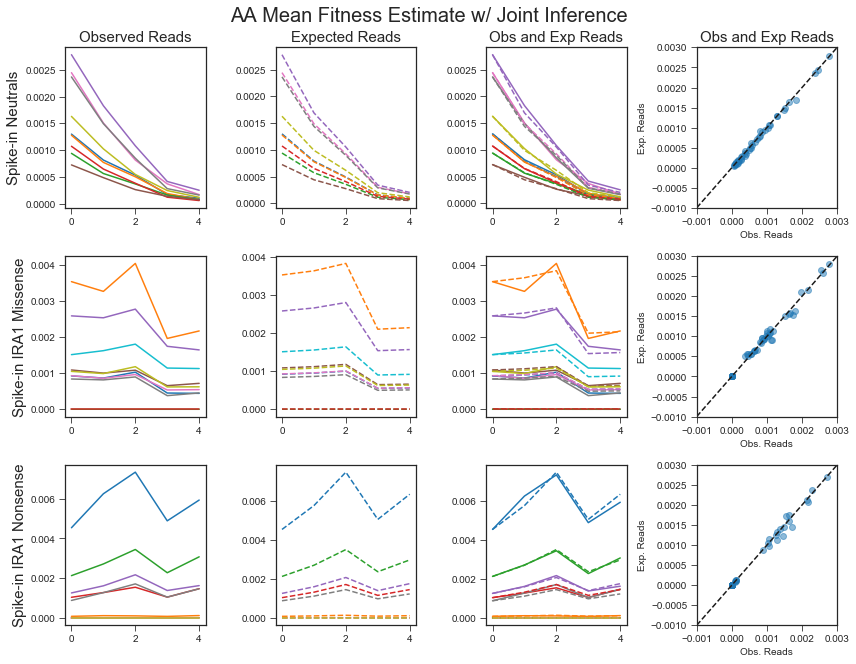

In [146]:
fig = plt.figure(figsize=(12,9))
real_sets = [neutral_locs,missense_locs,nonsense_locs]
set_names = ['Spike-in Neutrals','Spike-in IRA1 Missense','Spike-in IRA1 Nonsense']
exp_sets = index_mappings
subplot_counter = 1
for s in range(len(real_sets)):
    
    plt.subplot(3,4,subplot_counter)
    if s==0:
        plt.title('Observed Reads',fontsize=15)
    plt.ylabel(set_names[s],fontsize=15)
    plt.plot(timepoints,(BC_counts[real_sets[s],:]/np.nansum(BC_counts,axis=0)).swapaxes(0,1))
    subplot_counter += 1
    
    plt.subplot(3,4,subplot_counter)
    if s==0:
        plt.title('Expected Reads',fontsize=15)
    plt.plot(timepoints,(exp_reads[exp_sets[s],:]/np.nansum(BC_counts,axis=0)).swapaxes(0,1),linestyle='--')
    subplot_counter += 1
    
    ax = plt.subplot(3,4,subplot_counter)
    if s==0:
        plt.title('Obs and Exp Reads',fontsize=15)
    plt.plot(timepoints,(BC_counts[real_sets[s],:]/np.nansum(BC_counts,axis=0)).swapaxes(0,1))

    plt.gca().set_prop_cycle(None)
    plt.plot(timepoints,(exp_reads[exp_sets[s],:]/np.nansum(BC_counts,axis=0)).swapaxes(0,1),linestyle='--')
    subplot_counter += 1
    
    plt.subplot(3,4,subplot_counter)
    if s==0:
        plt.title('Obs and Exp Reads',fontsize=15)
    plt.scatter((BC_counts[real_sets[s],:]/np.nansum(BC_counts,axis=0)).swapaxes(0,1),(exp_reads[exp_sets[s],:]/np.nansum(BC_counts,axis=0)).swapaxes(0,1),alpha=0.5)
    subplot_counter += 1
    plt.xlim(-0.001,0.003)
    plt.ylim(-0.001,0.003)
    plt.xlabel('Obs. Reads')
    plt.ylabel('Exp. Reads')
    plt.plot([-0.001,0.003],[-0.001,0.003],'k--')
    
plt.tight_layout()
plt.suptitle(f'{condition} Mean Fitness Estimate w/ Joint Inference',fontsize=20,y=1.02)
# plt.savefig('MeanFitnessEstimation/m3a_meanfitness_est_joint_wANC.pdf',bbox_inches='tight')

# plt.figure(figsize=(9,3))
# subplot_counter = 131
# for s in range(len(real_sets)):
#     plt.subplot(subplot_counter)
#     plt.scatter((BC_counts[real_sets[s],:]/np.nansum(BC_counts,axis=0)).swapaxes(0,1),(exp_reads[exp_sets[s],:]/np.nansum(BC_counts,axis=0)).swapaxes(0,1),alpha=0.5)
#     subplot_counter += 1
#     plt.xlim(-0.001,0.003)
#     plt.ylim(-0.001,0.003)
#     plt.plot([-0.001,0.003],[-0.001,0.003],'k--')
# plt.tight_layout()

In [154]:
fitnesses = p.DataFrame()
fitnesses['barcode'] = data['barcode'].values

neutral_spikes = [17615,24362,42040,71926,73802,109476,113483,134852,316954]
neutrals = neutral_spikes

neutral_locs= []
for bc in neutrals:
    neutral_locs.append(np.where(data['barcode'].values == bc)[0][0])

experiment_details = {}
experiment_details['M3_B'] = ['M3_B_0','M3_B_1','M3_B_2','M3_B_3','M3_B_4']


for experiment in experiment_details.keys():
    fs_fitness, fs_reads, fs_mean = fitseq.fitseq(data[experiment_details[experiment]].values,timepoints,100,infer_ancestor=False,initial_anc_freq=0.9,
                                                  known_neutrals=neutral_locs,max_cycles=25,kappa=2.5,
                                                  mean_fitness_default=mean_fitness)
    fitnesses[experiment+'_fitness_ancinf_setmean'] = fs_fitness[:]

[[1.647700e+04 4.760000e+02 1.222600e+04 7.087000e+03 1.365000e+04]
 [1.839420e+05 1.295400e+04 6.562400e+05 9.624870e+05 3.236861e+06]
 [1.223600e+04 3.160000e+02 7.442000e+03 4.978000e+03 8.902000e+03]
 ...
 [9.476000e+03 4.780000e+02 1.905600e+04 2.657000e+04 6.427700e+04]
 [4.222000e+03 2.150000e+02 1.021200e+04 1.426000e+04 3.201200e+04]
 [2.623000e+04 1.222000e+03 6.111600e+04 7.446400e+04 1.977630e+05]]
[-3.29582972e-01  5.61504052e-01 -4.41675569e-01  4.93637313e-01
             nan -6.03315391e-01  5.42029554e-01             nan
 -4.36111464e-01  6.13981457e-01 -4.19745028e-01 -4.15590260e-03
  7.22468352e-01  6.24980584e-01 -4.45281191e-01  5.15476830e-01
 -4.57352414e-01 -2.32655558e-01  3.00695987e-01 -1.56271916e-01
 -4.34851165e-01  2.60836186e-01 -1.04624472e-01 -6.75651181e-02
  2.85553174e-01 -7.87219507e-01 -2.89999197e-01  6.66730770e-01
 -3.77519056e-01             nan -2.65529504e-01  2.71299408e-01
  8.30135897e-02 -3.87578038e-01 -3.31561580e-01  3.56345407e-01
 

[0.0, 54499.88871051033]


In [143]:
mean_fitness

array([0.6500031 , 0.66337639, 0.79419227, 0.84253195])

In [155]:
fitnesses
# data[experiment_details[experiment]].values

,barcode,M3_B_fitness_ancinf_setmean
0,53,0.157806
1,151,1.048893
2,262,0.045713
3,273,0.981026
4,323,NaN
5,323,-0.115927
6,415,1.029418
7,499,NaN
8,622,0.051277
9,689,1.101370


In [151]:
from Bio import SeqIO

In [154]:
oneanc = p.read_table('allBarcodeCounts_oneancestor.tab')

front_fasta = SeqIO.parse(open('Consecutive_500pool_NoConstant_OneAncestor_ReverseComplement.fasta'),'fasta')


# oneanc = p.read_table('.tab')
oneanc.columns = ['BCID'] + [col.split('/')[1].split('_barcodeCounts')[0] for col in oneanc.columns if '/' in col]

barcode_list = []
for record in front_fasta:
#     print(record)
    barcode_list.append(record.id)
oneanc['barcode'] = barcode_list

In [155]:
oneanc.to_csv('')

,BCID,FF3-DE1-PCRa,21-0-2,B1-DE1-PCRa,B2-DE1-PCRb,J1-DE1-PCRa,AA0-DE1-PCRa,B3-DE1-PCRc,R1-DE1-PCRa,Z1-DE1-PCRa,...,P0-DE1-PCRa,X0-DE1-PCRa,DD3-DE1-PCRa,Y4-DE3-PCRa,Y0-DE4-PCRa,EE3-DE1-PCRa,C3-DE1-PCRa,K3-DE1-PCRa,S3-DE1-PCRa,barcode
0,1,3424,0,493,224,4945,5638,2355,6578,482,...,7245,3803,682,143,129,1402,355,1123,1191,53
1,2,39418,12,12373,13842,68359,57352,121521,109407,9883,...,53297,37527,28394,70127,3079,22595,31769,4472,63244,151
2,3,2640,0,326,172,3661,4330,1955,5029,342,...,5375,2517,630,84,64,1057,232,779,897,262
3,4,12330,3,5290,4052,30824,28892,51201,70384,4013,...,24981,22417,8935,16166,1180,4501,9628,3847,16272,273
4,5,4752,3,1959,1363,17183,16885,24354,37221,1455,...,16254,9506,3345,3376,336,1974,2978,1717,5196,323
5,6,4876,3,4852,4586,23659,28724,66075,29934,2604,...,23738,14226,6500,30893,1150,2010,9425,185,17046,415
6,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,499
7,8,2124,0,303,135,3667,4353,1621,3960,299,...,5803,2436,434,89,74,826,240,722,519,622
8,9,3086,3,1410,1476,7893,9146,27987,11035,902,...,9161,4869,2503,13856,410,1693,3022,24,5894,689
9,10,2162,2,389,154,4379,4745,1633,4473,380,...,6211,2705,442,108,82,890,260,733,674,697


In [54]:

data = merged_data

neutral_spikes = [17615,24362,42040,71926,73802,109476,113483,134852,263665,316954]
diploids = 
# neutrals = list(np.unique(neutrals + neutral_spikes))
neutrals = neutral_spikes
neutrals = diploids
# print(neutrals)

fitnesses = {}
for experiment in conditions:
#     l = range(len(experiment_details[experiment]))
#     print(np.sum(data[experiment_details[experiment]].values))
    condition = experiment
    cov_thresh = 0
    these_times = []
    timepoints = []
    for i in range(5):
        if condition+str(i) in data.columns:
            these_times.append(condition+str(i))
            timepoints.append(i)
    answer = atish.inferFitness(data['barcode'].values,timepoints,{'rep1':data[these_times].values},neutralBarcodes=neutrals,lowCoverageThresh=cov_thresh,use_all_neutral=True)
#     answer = atish.inferFitness(data['barcode'].values,timepoints,{'rep1':data[experiment_details[experiment]].values},lowCoverageThresh=cov_thresh,neutralBarcodes=neutral_spikes)
    print(answer['rep1']['neutralBarcodes'])
#     neutrals.append(answer['rep1']['neutralBarcodes'])
    fitnesses[experiment+'_fitness'] = answer['rep1']['aveFitness']
    fitnesses[experiment+'_error'] = answer['rep1']['aveError']
fitnesses['barcode'] = data['barcode'].values

[17615, 24362, 42040, 71926, 73802, 109476, 113483, 134852, 263665, 316954]
[0, 1, 2, 3, 4]
neutrals inside 551
5
reads 41247.0 40668.0
reads 40668.0 36726.0
reads 36726.0 1881.0
reads 1881.0 4650.0
reads 41247.0 40668.0
reads 40668.0 36726.0
reads 36726.0 1881.0
reads 1881.0 4650.0
inside again 551
inside again2 [0.38247513 0.53593985 1.02811172 0.46271077]
Multiplicative noise consistency checks

rep1  inconsistent times:

No clear inconsistencies

[ 17615  24362  42040  71926  73802 109476 113483 134852 263665 316954]
[0, 1, 2, 3, 4]
neutrals inside 551
5
reads 136584.0 16757.0
reads 16757.0 75228.0
reads 75228.0 34455.0
reads 34455.0 41830.0
reads 136584.0 16757.0
reads 16757.0 75228.0
reads 75228.0 34455.0
reads 34455.0 41830.0
inside again 551
inside again2 [0.52010962 0.56425115 0.56850439 0.53843464]
Multiplicative noise consistency checks

rep1  inconsistent times:

No clear inconsistencies

[ 17615  24362  42040  71926  73802 109476 113483 134852 263665 316954]
[0, 1, 2, 3, 4

/Users/grantkinsler/Documents/Stanford/Research/StarryNight/Git/starry-night/FitnessAssay/fitness-assay-python-master-update/fitness_assay_grantedits.py:214: RuntimeWarning: divide by zero encountered in power
  zScores = zScores*np.power(expectedReads,-0.5)
/Users/grantkinsler/Documents/Stanford/Research/StarryNight/Git/starry-night/FitnessAssay/fitness-assay-python-master-update/fitness_assay_grantedits.py:214: RuntimeWarning: invalid value encountered in multiply
  zScores = zScores*np.power(expectedReads,-0.5)
/Users/grantkinsler/Documents/Stanford/Research/StarryNight/Git/starry-night/FitnessAssay/fitness-assay-python-master-update/fitness_assay_grantedits.py:379: RuntimeWarning: divide by zero encountered in log
  allTimeFitness = np.log(allReads[repName][:,1:]/totReads[1:])-np.log(allReads[repName][:,0:-1]/totReads[0:-1])
/Users/grantkinsler/Documents/Stanford/Research/StarryNight/Git/starry-night/FitnessAssay/fitness-assay-python-master-update/fitness_assay_grantedits.py:379: R


neutrals inside 551
5
reads 52136.0 62569.0
reads 62569.0 28127.0
reads 28127.0 4480.0
reads 4480.0 4420.0
reads 52136.0 62569.0
reads 62569.0 28127.0
reads 28127.0 4480.0
reads 4480.0 4420.0
inside again 551
inside again2 [-0.17187238  0.17708027  0.07346587  0.4684199 ]
Multiplicative noise consistency checks

rep1  inconsistent times:

No clear inconsistencies

[ 17615  24362  42040  71926  73802 109476 113483 134852 263665 316954]
[0, 1, 2, 3, 4]
neutrals inside 551
5
reads 35916.0 17608.0
reads 17608.0 16009.0
reads 16009.0 8010.0
reads 8010.0 658.0
reads 35916.0 17608.0
reads 17608.0 16009.0
reads 16009.0 8010.0
reads 8010.0 658.0
inside again 551
inside again2 [0.69801849 0.17948742 0.54912943 0.82289139]
Multiplicative noise consistency checks

rep1  inconsistent times:

No clear inconsistencies

[ 17615  24362  42040  71926  73802 109476 113483 134852 263665 316954]
[0, 1, 2, 3, 4]
neutrals inside 551
5
reads 17933.0 34980.0
reads 34980.0 16501.0
reads 16501.0 1511.0
reads 15

In [55]:
fitness_df = p.DataFrame(fitnesses)

In [ ]:
spike_in_missense = [9000000 + i for i in range(11)]
spike_in_nonsense = [9000100 + i for i in range(11)]

color_set = []
alphas = []
for bc in data['barcode'].values:
    if bc in spike_in_missense:
        color_set.append(colors.to_rgba('r',0.5))
    elif bc in spike_in_nonsense:
        color_set.append(colors.to_rgba('orange',0.5))
    elif bc in neutrals:
        colors.append(colors.to_rgba('b',0.5))
    else:
        colors.append(colors.to_rgba('k',0.1))

for j,condition in enumerate(['A','B','C','D']):
    plt.scatter([jitter_point(j,0.05) for  i in range(len(fitnesses[f'{condition}_fitness']))],fitnesses[f'{condition}_fitness'],alpha=0.2,color=color_set)
    
    
# plt.savefig('fitness.png',bbox_inches='tight')

In [27]:
[jitter_point(0,2.0)]*len(fitnesses['A_fitness'])

[-4.330872384691713,
 -4.330872384691713,
 -4.330872384691713,
 -4.330872384691713,
 -4.330872384691713,
 -4.330872384691713,
 -4.330872384691713,
 -4.330872384691713,
 -4.330872384691713,
 -4.330872384691713,
 -4.330872384691713,
 -4.330872384691713,
 -4.330872384691713,
 -4.330872384691713,
 -4.330872384691713,
 -4.330872384691713,
 -4.330872384691713,
 -4.330872384691713,
 -4.330872384691713,
 -4.330872384691713,
 -4.330872384691713,
 -4.330872384691713,
 -4.330872384691713,
 -4.330872384691713,
 -4.330872384691713,
 -4.330872384691713,
 -4.330872384691713,
 -4.330872384691713,
 -4.330872384691713,
 -4.330872384691713,
 -4.330872384691713,
 -4.330872384691713,
 -4.330872384691713,
 -4.330872384691713,
 -4.330872384691713,
 -4.330872384691713,
 -4.330872384691713,
 -4.330872384691713,
 -4.330872384691713,
 -4.330872384691713,
 -4.330872384691713,
 -4.330872384691713,
 -4.330872384691713,
 -4.330872384691713,
 -4.330872384691713,
 -4.330872384691713,
 -4.330872384691713,
 -4.330872384